In [1]:
import pm4py
import pandas as pd
import utility
import hospital_log_preprocessor
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
event_log = hospital_log_preprocessor.import_xes('data/Hospital_log_modified.xes')

c:\Users\haert\AppData\Local\Programs\Python\Python310\lib\site-packages\pm4py\util\dt_parsing\parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/1143 [00:00<?, ?it/s]

In [7]:
petri_net, im, fm = pm4py.discovery.discover_petri_net_alpha(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.write.write_pnml(petri_net, im, fm, "hosptial_log_petri_net")
pm4py.vis.view_petri_net(petri_net, im, fm, format='png')

In [ ]:
for col in event_log.columns.sort_values():
    unique_values = event_log[col].unique().tolist()
    amount_nan = event_log[col].isna().sum()
    # print("Name: {:50s} | unique values {:5d} | #NaNs in DF: {:6d}".format(col, len(unique_values), amount_nan))
    # print("Name: {} | unique values {} | #NaNs in DF: {}".format(col, len(unique_values), amount_nan))
    # print(unique_values)
    print(col)

In [5]:
# Accumulate case-specific inforamtion
age_cols = ['case:Age', 'case:Age:1', 'case:Age:2', 'case:Age:3', 'case:Age:4', 'case:Age:5']
treatment_cols = ['case:Treatment code', 'case:Treatment code:1', 'case:Treatment code:2', 'case:Treatment code:3', 'case:Treatment code:4', 'case:Treatment code:5', 'case:Treatment code:6', 'case:Treatment code:7', 'case:Treatment code:8', 'case:Treatment code:9', 'case:Treatment code:10', 'case:Treatment code:11', 'case:Treatment code:12', 'case:Treatment code:13', 'case:Treatment code:14', 'case:Treatment code:15']
specialism_cols = ['case:Specialism code', 'case:Specialism code:1', 'case:Specialism code:2', 'case:Specialism code:3', 'case:Specialism code:4', 'case:Specialism code:5', 'case:Specialism code:6', 'case:Specialism code:7', 'case:Specialism code:8', 'case:Specialism code:9', 'case:Specialism code:10', 'case:Specialism code:11', 'case:Specialism code:12', 'case:Specialism code:13', 'case:Specialism code:14', 'case:Specialism code:15']
diagnosis_cols = ['case:Diagnosis:1', 'case:Diagnosis:2', 'case:Diagnosis:3', 'case:Diagnosis:4', 'case:Diagnosis:5', 'case:Diagnosis:6', 'case:Diagnosis:7', 'case:Diagnosis:8', 'case:Diagnosis:9', 'case:Diagnosis:10', 'case:Diagnosis:11', 'case:Diagnosis:12', 'case:Diagnosis:13', 'case:Diagnosis:14', 'case:Diagnosis:15']
diagnosisCode_cols = ['case:Diagnosis code', 'case:Diagnosis code:1', 'case:Diagnosis code:2', 'case:Diagnosis code:3', 'case:Diagnosis code:4', 'case:Diagnosis code:5', 'case:Diagnosis code:6', 'case:Diagnosis code:7', 'case:Diagnosis code:8', 'case:Diagnosis code:9', 'case:Diagnosis code:10', 'case:Diagnosis code:11', 'case:Diagnosis code:12', 'case:Diagnosis code:13', 'case:Diagnosis code:14', 'case:Diagnosis code:15']
diagnosis_treatment_combi_id_cols = ['case:Diagnosis Treatment Combination ID', 'case:Diagnosis Treatment Combination ID:1', 'case:Diagnosis Treatment Combination ID:2', 'case:Diagnosis Treatment Combination ID:3', 'case:Diagnosis Treatment Combination ID:4', 'case:Diagnosis Treatment Combination ID:5', 'case:Diagnosis Treatment Combination ID:6', 'case:Diagnosis Treatment Combination ID:7', 'case:Diagnosis Treatment Combination ID:8', 'case:Diagnosis Treatment Combination ID:9', 'case:Diagnosis Treatment Combination ID:10', 'case:Diagnosis Treatment Combination ID:11', 'case:Diagnosis Treatment Combination ID:12', 'case:Diagnosis Treatment Combination ID:13', 'case:Diagnosis Treatment Combination ID:14', 'case:Diagnosis Treatment Combination ID:15']

event_log_new = event_log[['case:concept:name']]
event_log_new['age'] = event_log.apply(lambda row: ', '.join(str(int(val)) for val in row[age_cols].dropna().unique()), axis=1)
event_log_new['Treatment codes'] = event_log.apply(lambda row: ', '.join(str(int(val)) for val in row[treatment_cols].dropna().unique()), axis=1)
event_log_new['Specialism codes'] = event_log.apply(lambda row: ', '.join(str(int(val)) for val in row[specialism_cols].dropna().unique()), axis=1)
event_log_new['Diagnosis codes'] = event_log.apply(lambda row: ', '.join(str(val) for val in row[diagnosisCode_cols].dropna().unique()), axis=1)
event_log_new['Diagnosis Treatment Combination IDs'] = event_log.apply(lambda row: ', '.join(str(int(val)) for val in row[diagnosis_treatment_combi_id_cols].dropna().unique()), axis=1)
event_log_new['Diagnosis'] = event_log.apply(lambda row: ', '.join(str(val) for val in row[diagnosis_cols].dropna().unique()), axis=1)

C:\Users\haert\AppData\Local\Temp\ipykernel_12444\2861881286.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_log_new['age'] = event_log.apply(lambda row: ', '.join(str(int(val)) for val in row[age_cols].dropna().unique()), axis=1)
C:\Users\haert\AppData\Local\Temp\ipykernel_12444\2861881286.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_log_new['Treatment codes'] = event_log.apply(lambda row: ', '.join(str(int(val)) for val in row[treatment_cols].dropna().unique()), axis=1)
C:\Users\h

In [6]:
# Extract start and end date
start_dates_cols = ['case:Start date', 'case:Start date:1', 'case:Start date:2', 'case:Start date:3', 'case:Start date:4', 'case:Start date:5', 'case:Start date:6', 'case:Start date:7', 'case:Start date:8', 'case:Start date:9', 'case:Start date:10', 'case:Start date:11', 'case:Start date:12', 'case:Start date:13', 'case:Start date:14', 'case:Start date:15']
end_dates_cols = ['case:End date', 'case:End date:1', 'case:End date:2', 'case:End date:3', 'case:End date:4', 'case:End date:5', 'case:End date:6', 'case:End date:7', 'case:End date:8', 'case:End date:9', 'case:End date:10', 'case:End date:11', 'case:End date:12', 'case:End date:13', 'case:End date:14', 'case:End date:15']
event_log[start_dates_cols] = event_log[start_dates_cols].apply(pd.to_datetime, errors='coerce', utc=True)
event_log[end_dates_cols] = event_log[end_dates_cols].apply(pd.to_datetime, errors='coerce', utc=True)
event_log_new['Min Start Date'] = event_log.apply(lambda row: min(row[start_dates_cols].dropna(), default=pd.NaT), axis=1)
event_log_new['Max End Date'] = event_log.apply(lambda row: max(row[end_dates_cols].dropna(), default=pd.NaT), axis=1)

C:\Users\haert\AppData\Local\Temp\ipykernel_12444\4223673965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_log_new['Min Start Date'] = event_log.apply(lambda row: min(row[start_dates_cols].dropna(), default=pd.NaT), axis=1)
C:\Users\haert\AppData\Local\Temp\ipykernel_12444\4223673965.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_log_new['Max End Date'] = event_log.apply(lambda row: max(row[end_dates_cols].dropna(), default=pd.NaT), axis=1)


In [7]:
# I only want to keep one row per case
event_log_case_specific = event_log_new.drop_duplicates()
event_log_case_specific.set_index('case:concept:name', inplace=True)

In [20]:
# Save dfs to CSV-File
dir = './data/'
event_log_new.to_csv(dir + 'event_log_modified.csv')
event_log_case_specific.to_csv(dir + 'event_log_case_specific.csv')

In [21]:
# Read dfs from CSV-File
dir = './data/'
event_log_new = pd.read_csv(dir + 'event_log_modified.csv', index_col=0)
event_log_case_specific = pd.read_csv(dir + 'event_log_case_specific.csv', index_col=0)

In [169]:
def compute_uniqueness(df, cols):
    amount_cases = df.shape[0]
    unique_values_in_column = df[cols].drop_duplicates().shape[0]
    uniquenss_of_col = round(unique_values_in_column / amount_cases, 4) * 100
    return uniquenss_of_col

def get_all_combinations(cols, max_combi_size):
    all_column_combinations = []
    for r in range(1, max_combi_size + 1):
        all_column_combinations.extend(product(cols, repeat=r))

    # Filter the list to keep only (x, y) and not (y, x)
    sorted_list = []
    for tuple in all_column_combinations:
        sorted_list.append(set(sorted(list(tuple))))

    unique_sets = set(frozenset(s) for s in sorted_list)

    # Convert back to a list
    unique_sets_list = list(unique_sets)

    return unique_sets_list

In [176]:
# Get all column combinations up to a maximum amount of columns
all_column_combinations = get_all_combinations(cols=event_log_case_specific.columns, max_combi_size=3)

# Calculate uniqueness for each combination
uniqueness_of_col_combinations = {}
for columns in all_column_combinations:
    uniqueness = compute_uniqueness(event_log_case_specific, list(columns))
    uniqueness_of_col_combinations[columns] = uniqueness

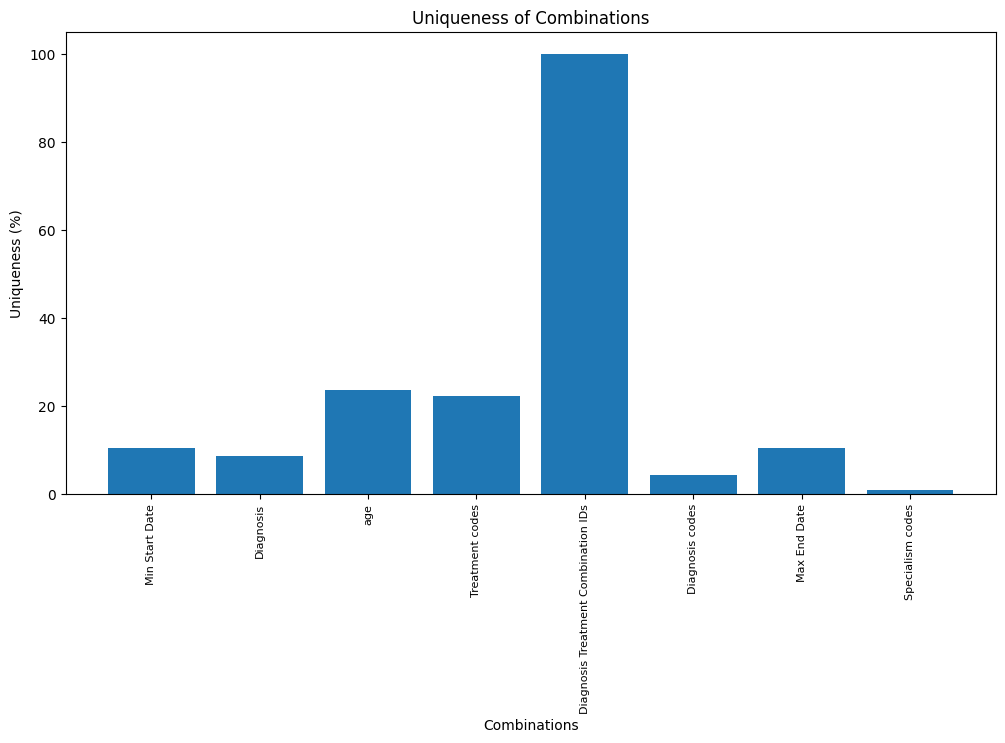

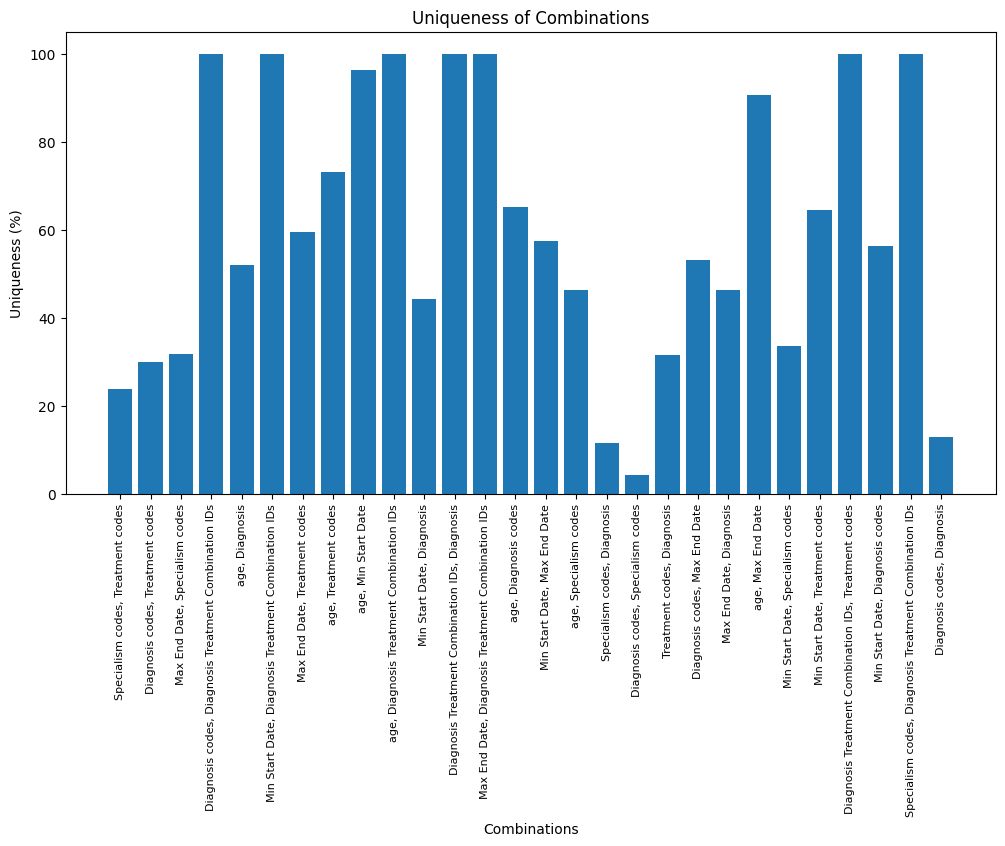

In [178]:
for i in range(1, 3):
    filtered_dict = {key: value for key, value in uniqueness_of_col_combinations.items() if len(key) == i}
    combinations, values = zip(*filtered_dict.items())
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(combinations)), values, align='center')
    plt.xticks(range(len(combinations)), [', '.join(combination) for combination in combinations], rotation=90, fontsize=8)
    plt.xlabel('Combinations')
    plt.ylabel('Uniqueness (%)')
    plt.title('Uniqueness of Combinations')
    plt.show()

C:\Users\haert\AppData\Local\Temp\ipykernel_12444\97258629.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_two_columns['Combination'] = df_two_columns['Combination'].apply(sorted)


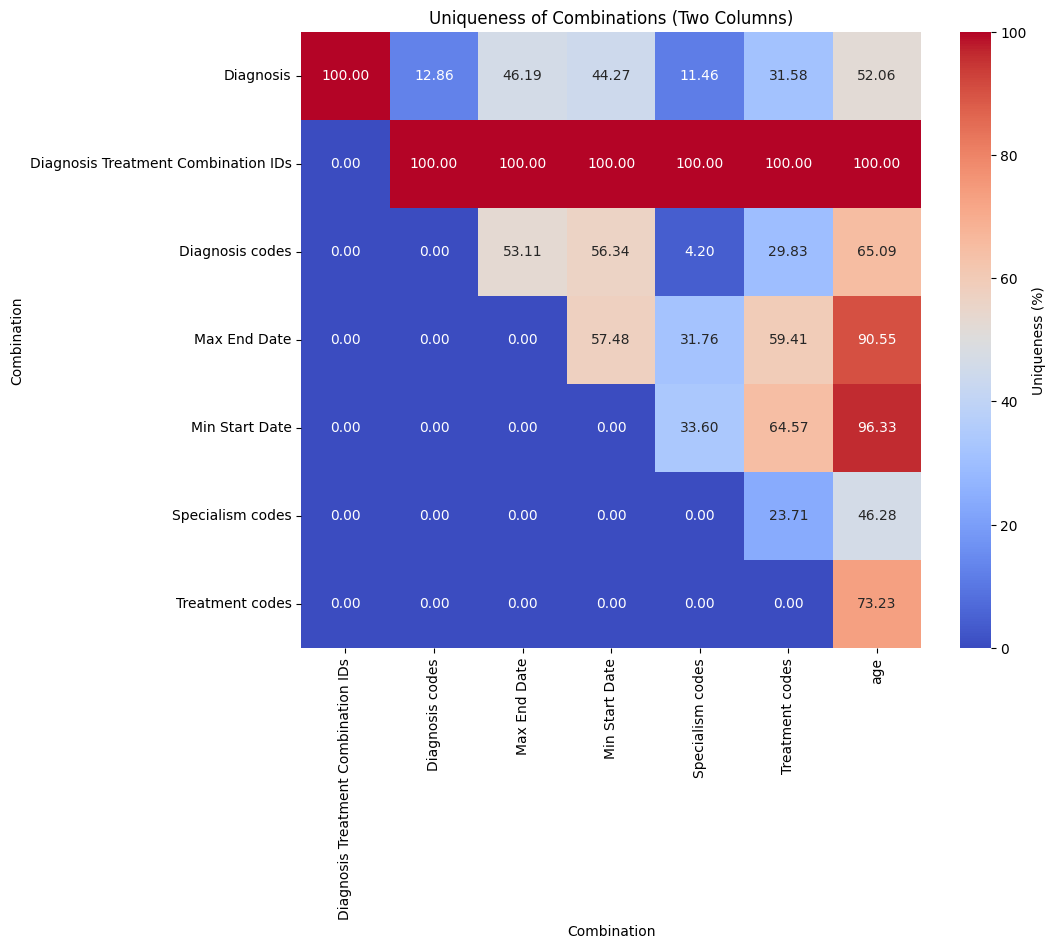

In [175]:
# Lets visualize the uniqueness of combinations of 2 columns
df = pd.DataFrame(list(uniqueness_of_col_combinations.items()), columns=['Combination', 'Uniqueness'])

# Extract combinations of size 2
df_two_columns = df[df['Combination'].apply(len) == 2]
df_two_columns['Combination'] = df_two_columns['Combination'].apply(sorted)

# Create a pivot table for the heatmap
heatmap_data = df_two_columns.pivot_table(index=df_two_columns['Combination'].apply(lambda x: x[0]),
                                          columns=df_two_columns['Combination'].apply(lambda x: x[1]),
                                          values='Uniqueness').fillna(0)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Uniqueness (%)'})
plt.title('Uniqueness of Combinations (Two Columns)')
plt.show()

In [179]:
# Combinations with 3 different columns and an uniqueness > a certain threshold
threshold = 75
# Filter all combinations which contain Diagnosis Treatment Combination ID (since the prob is always 100 %) and all combinations which contain the same column mutliple times
df_triples = df[df['Combination'].apply(lambda x: ('Diagnosis Treatment Combination IDs' not in x) and (len(set(x)) == len(x)))]
df_triples = df_triples[(df_triples['Combination'].apply(len) == 3) & (df_triples['Uniqueness'] >= threshold)]
df_triples['Combination'] = df_triples['Combination'].apply(sorted)

In [180]:
df_triples['Combination'] = df_triples['Combination'].apply(lambda x: ', '.join(x))
df_triples.drop_duplicates(inplace=True)
print(df_triples.sort_values("Uniqueness", ascending=False))

                                         Combination  Uniqueness
72              Min Start Date, Treatment codes, age       99.21
63              Diagnosis codes, Min Start Date, age       98.95
7                  Max End Date, Min Start Date, age       98.78
66             Min Start Date, Specialism codes, age       98.08
28                    Diagnosis, Min Start Date, age       97.99
77                Max End Date, Treatment codes, age       97.38
40                Diagnosis codes, Max End Date, age       96.94
60               Max End Date, Specialism codes, age       93.09
18                      Diagnosis, Max End Date, age       92.39
82             Diagnosis codes, Treatment codes, age       85.30
87     Diagnosis codes, Max End Date, Min Start Date       82.33
20     Max End Date, Min Start Date, Treatment codes       78.74
57                   Diagnosis, Treatment codes, age       78.65
69  Diagnosis codes, Min Start Date, Treatment codes       78.39
10        Diagnosis, Min 

In [181]:
# Now let's focus on the uniqueness of traces
df_activites_per_case = event_log.groupby('case:concept:name')['Activity code'].agg(lambda x: ', '.join(str(val).strip() for val in x if pd.notna(val))).reset_index()
df_activites_per_case

,case:concept:name,Activity code
0,00000000,"410100, 419100, 10107, 339486E, 410100, 419100..."
1,00000001,"10113, 410100, 419100, 10107, 411100, 419100, ..."
2,00000002,"10113, 411100, 411100, 419100, 411100, 411100,..."
3,00000003,"10113, 370000, 378149, 379999, 411100, 419100,..."
4,00000004,"10107, 355201, 370000, 370000, 370000, 370401,..."
...,...,...
1138,00001138,"339486E, 370000, 370000, 370000, 370401, 37040..."
1139,00001139,"355111, 370000, 370000, 370401, 370401C, 37040..."
1140,00001140,"370000, 370000, 370000, 370401, 370401C, 37040..."
1141,00001141,"330001B, 370000, 370000, 370000, 370401, 37040..."


In [182]:
# percentage of unique traces in the log
uniqueness_of_traces = compute_uniqueness(df_activites_per_case, 'Activity code')
print("{} %".format(uniqueness_of_traces))

85.83 %


In [183]:
# Compute the uniqueness of each activity --> With which probability can I reidentify a case (trace) given that a specific activity is contained in the trace
total_amount_traces = df_activites_per_case.shape[0]
total_amount_activities = event_log['Activity code'].unique().shape[0]
unique_activity_codes = event_log['Activity code'].unique()
uniqueness_containing_activity = pd.DataFrame(unique_activity_codes, columns=['activity code'])
counts = {}
appears = {}

def helper_count(row, activity_code):
    total_counts = str(row).count(str(activity_code))
    return 1 if total_counts > 0 else 0

for activity_code in unique_activity_codes:
    counts[str(activity_code)] = int(df_activites_per_case['Activity code'].apply(lambda row: str(row).count(str(activity_code))).values.sum())
    appears[str(activity_code)] = df_activites_per_case['Activity code'].apply(lambda row: helper_count(row, activity_code)).values.sum()

df_unique_activity_codes = pd.DataFrame([counts.keys(), counts.values(), appears.values()]).T
df_unique_activity_codes.columns = ['Activity code', 'total counts', 'containedInTrace']

# Compute uniqueness
df_unique_activity_codes['uniqueness'] = 1 - (df_unique_activity_codes['containedInTrace'] - 1) / total_amount_traces

print(df_unique_activity_codes.sort_values('uniqueness', ascending=False))

    Activity code total counts containedInTrace uniqueness
672       375143B            1                1        1.0
539       389370R            1                1        1.0
548       375561E            1                1        1.0
504        377450            1                1        1.0
545       378452A            1                1        1.0
..            ...          ...              ...        ...
9        370407.0         4275              729    0.36308
7          370000        15353              804   0.297463
15         379999         9008              804   0.297463
32         411100         5239              958    0.16273
1          419100         2171             1110   0.029746

[673 rows x 4 columns]


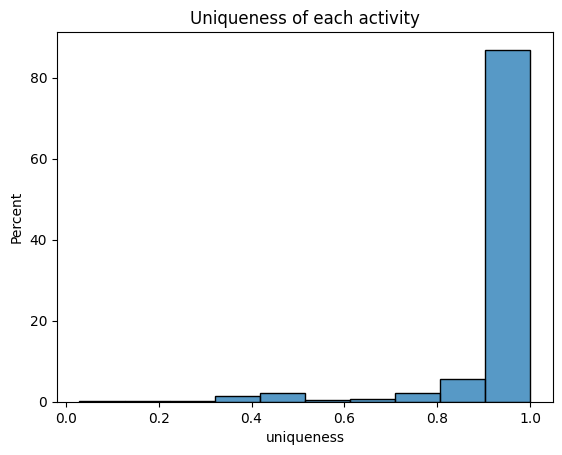

Bin 1 -  Count: 1, Percentage: 0.15 %
Bin 2 -  Count: 1, Percentage: 0.15 %
Bin 3 -  Count: 2, Percentage: 0.3 %
Bin 4 -  Count: 10, Percentage: 1.49 %
Bin 5 -  Count: 15, Percentage: 2.23 %
Bin 6 -  Count: 3, Percentage: 0.44999999999999996 %
Bin 7 -  Count: 5, Percentage: 0.74 %
Bin 8 -  Count: 14, Percentage: 2.08 %
Bin 9 -  Count: 37, Percentage: 5.5 %
Bin 10 -  Count: 585, Percentage: 86.92 %

192 activities are completely unique


In [184]:
amount_bins = 10
sns.histplot(df_unique_activity_codes['uniqueness'], bins=amount_bins, stat='percent').set(title='Uniqueness of each activity')
plt.show()

hist_values, bin_edges = np.histogram(df_unique_activity_codes['uniqueness'], bins=amount_bins)

# Print out the histogram values
for i in range(len(hist_values)):
    print(f"Bin {i+1} -  Count: {hist_values[i]}, Percentage: {round(hist_values[i]/total_amount_activities, 4) * 100} %")

# Count of activities which have a uniqueness of 100%
amount_completely_unique_activities = df_unique_activity_codes[df_unique_activity_codes['uniqueness'] == 1]['Activity code'].count()
print("\n{} activities are completely unique".format(amount_completely_unique_activities))

In [185]:
# unique traces in the event log not considering the order of execution of the activities and how many times each activity was executed

df_activites_per_case_as_set = df_activites_per_case
# Convert String to list, then to set to remove duplicates and then convert set back to list to order the elements. Finally, convert list back to a String
df_activites_per_case_as_set['Ordered Activity Set'] = df_activites_per_case['Activity code'].apply(lambda row: ", ".join(sorted(list(set(row.split(", "))))))

# Compute Uniqueness
unordered_set_uniquness_of_activities = compute_uniqueness(df_activites_per_case_as_set, cols=['Ordered Activity Set'])
print("{} % of traces are unique not considering the order of execution of the activities and how many times each activity was executed".format(unordered_set_uniquness_of_activities))

77.60000000000001 % of traces are unique not considering the order of execution of the activities and how many times each activity was executed


In [187]:
# Let's have a look at combinations of activities of size 2: Given that I know 2 activities which are contained in a specific log, 
# How likely is a direct identification of a specific case?
# Neglecting the order or the amount of executions of each activity

not_unique_activities = df_unique_activity_codes[df_unique_activity_codes['containedInTrace'] > 1]['Activity code'].values
all_column_combinations = get_all_combinations(cols=list(not_unique_activities), max_combi_size=2)



frozenset({'370741', '370737C'})
